In [1]:
__nbid__ = '0016'
__author__ = 'Leah Fulmer, David Herrera <david.herrera@noirlab.edu>, Astro Data Lab Team <datalab@noirlab.edu>'
__version__ = '20251205' # yyyymmdd
__datasets__ = ['decaps_dr2']
__keywords__ = ['Milky Way', 'stars', 'plot:color-color', 'plot:cmd']

# Estructura Galáctica a partir del DECam Plane Survey (DECaPS)
por Leah Fulmer, Stéphanie Juneau, Knut Olsen y el equipo de Astro Data Lab

#### (_Traducción de [GalacticStructureDECaPS.ipynb](https://github.com/astro-datalab/notebooks-latest/blob/master/03_ScienceExamples/GalacticStructure/GalacticStructureDECaPS.ipynb)_)

### Tabla de Contenido
* [Avisos Legales y Atribuciones](#attribution)
* [Objetivos y Resumen](#introduction)
* [Importaciones y Configuración](#import)
* [Autenticación](#auth)
* [Exploración del Catálogo de Objetos de DECaPS](#explore)
* [Consulta al Catálogo de Objetos de DECaPS: Estrellas de Campo](#field)
    * [Visualizar Objetos a Consultar](#field1)
    * [Construir una Consulta SQL](#field2)
    * [Enviar la Consulta SQL](#field3)
    * [Definir un Umbral de Selección de Datos para el Análisis](#field4)
    * [Graficar Resultados](#field5)
    * [Examinar Objetos en el Visor del Cielo de Legacy Survey](#field6)
* [Consulta al Catálogo de Objetos de DECaPS: Región con Polvo](#dusty)
    * [Visualizar Objetos a Consultar](#dusty1)
    * [Construir y Enviar una Consulta SQL](#dusty2)
    * [Definir un Umbral de Selección de Datos para el Análisis](#dusty3)
    * [Graficar Resultados](#dusty4)
    * [Examinar Objetos en el Visor del Cielo de Legacy Survey](#dusty5)
* [Consulta al Catálogo de Objetos de DECaPS: Cúmulo Abierto 2447](#2447)
    * [Visualizar Objetos a Consultar](#24471)
    * [Construir y Enviar una Consulta SQL](#24472)
    * [Definir un Umbral de Selección de Datos para el Análisis](#24473)
    * [Graficar Resultados](#24474)
    * [Examinar Objetos en el Visor del Cielo de Legacy Survey](#24475)
* [Recursos y Referencias](#resources)

<a class="anchor" id="attribution"></a>
# Avisos Legales y atribuciones

Avisos Legales
-----------
Tome en cuenta que usar el Astro Data Lab constituye un acuerdo con nuestros [Avisos Legales](https://datalab.noirlab.edu/disclaimers.php) mínimos.

Reconocimientos
---------------
Si ud. usa el **Astro Data Lab** en sus publicaciones de investigación, por favor incluya el siguiente texto en la sección de Reconocimientos de su publicaciones:

_Esta investigación utiliza servicios de datos proveeidos por el Astro Data Lab, el cual es parte del Programa "Community Science and Data Center" (CSDC) (Centro de Ciencia Comunitaria y Datos) del NSF NOIRLab. NOIRLab es operado por la "Association of Universities for Research in Astronomy (AURA), Inc."(Asociación de Universidaddes para la Investigación en Astronomía, Inc.), bajo un acuerdo de cooperación con la "U.S. National Science Foundation" (Fundación Nacional de Ciencia de los EE. UU.)._

Si utiliza **SPARCL junto con la plataforma de Astro Data Lab** (por medio de JupyterLab, línea de comando o interfaz de la web) en su publicación de investigación, por favor incluya el siguiente texto en la sección de Reconocimientos de su publicaciones:

_Esta investigación utiliza servicios o datos proporcionados por el "SPectra Analysis and Retrievable Catalog Lab" (SPARCL) (Laboratorio de Análisis y Catálogo Recuperable de Espectros) y el Astro Data Lab, ambos pertenecientes al Programa "Community Science and Data Center" (CSDC) (Centro de Ciencia Comunitaria y Datos) de NSF NOIRLab. NOIRLab es operado por la "Association of Universities for Research in Astronomy (AURA), Inc." (Asociación de Universidades para la Investigación en Astronomía, Inc.), bajo un acuerdo de cooperación con la "U.S. National Science Foundation" (Fundación Nacional de Ciencia de los EE. UU.)._

En cualquiera de los casos, **por favor cite las siguientes publicaciones**:

* Publicación del concepto de Data Lab: Fitzpatrick et al., "The NOAO Data Laboratory: a conceptual overview", SPIE, 9149, 2014, https://doi.org/10.1117/12.2057445

* Descripción general del Astro Data Lab: Nikutta et al., "Data Lab - A Community Science Platform", Astronomy and Computing, 33, 2020, https://doi.org/10.1016/j.ascom.2020.100411.

Si hace referencia al Jupyterlab / Jupyter notebooks de Data Lab, cite:

* Juneau et al., "Jupyter-Enabled Astrophysical Analysis Using Data-Proximate Computing Platforms", CiSE, 23, 15, 2021, https://doi.org/10.1109/MCSE.2021.3057097.

Si publica en una revista de la AAS, agregue también la palabra clave `\facility{Astro Data Lab}`

Y si está usando SPARCL, por vor agregue también `\software{SPARCL}` y cite:

* Juneau et al., "SPARCL: SPectra Analysis and Retrievable Catalog Lab", Conference Proceedings for ADASS XXXIII, 2024
https://doi.org/10.48550/arXiv.2401.05576.

La biblioteca de NOIRLab mantiene [listas de reconocimientos apropiados](https://noirlab.edu/science/about/scientific-acknowledgments) para usar cuando se hacen publicaciones utilizando los recursos, servicios o datos del Laboratorio.

---- **Versión en Inglés** ----

# Disclaimer & attribution

Disclaimers
-----------
Note that using the Astro Data Lab constitutes your agreement with our minimal [Disclaimers](https://datalab.noirlab.edu/disclaimers.php).

Acknowledgments
---------------
If you use **Astro Data Lab** in your published research, please include the text in your paper's Acknowledgments section:

_This research uses services or data provided by the Astro Data Lab, which is part of the Community Science and Data Center (CSDC) Program of NSF NOIRLab. NOIRLab is operated by the Association of Universities for Research in Astronomy (AURA), Inc. under a cooperative agreement with the U.S. National Science Foundation._

If you use **SPARCL jointly with the Astro Data Lab platform** (via JupyterLab, command-line, or web interface) in your published research, please include this text below in your paper's Acknowledgments section:

_This research uses services or data provided by the SPectra Analysis and Retrievable Catalog Lab (SPARCL) and the Astro Data Lab, which are both part of the Community Science and Data Center (CSDC) Program of NSF NOIRLab. NOIRLab is operated by the Association of Universities for Research in Astronomy (AURA), Inc. under a cooperative agreement with the U.S. National Science Foundation._

In either case **please cite the following papers**:

* Data Lab concept paper: Fitzpatrick et al., "The NOAO Data Laboratory: a conceptual overview", SPIE, 9149, 2014, https://doi.org/10.1117/12.2057445

* Astro Data Lab overview: Nikutta et al., "Data Lab - A Community Science Platform", Astronomy and Computing, 33, 2020, https://doi.org/10.1016/j.ascom.2020.100411

If you are referring to the Data Lab JupyterLab / Jupyter Notebooks, cite:

* Juneau et al., "Jupyter-Enabled Astrophysical Analysis Using Data-Proximate Computing Platforms", CiSE, 23, 15, 2021, https://doi.org/10.1109/MCSE.2021.3057097

If publishing in a AAS journal, also add the keyword: `\facility{Astro Data Lab}`

And if you are using SPARCL, please also add `\software{SPARCL}` and cite:

* Juneau et al., "SPARCL: SPectra Analysis and Retrievable Catalog Lab", Conference Proceedings for ADASS XXXIII, 2024
https://doi.org/10.48550/arXiv.2401.05576

The NOIRLab Library maintains [lists of proper acknowledgments](https://noirlab.edu/science/about/scientific-acknowledgments) to use when publishing papers using the Lab's facilities, data, or services.

<a class="anchor" id="introduction"></a>
# Objetivos
* Explorar el catálogo y survey DECaPS DR2
* Construir una consulta SQL simple relevante a DECaPS DR2
* Hacer diagramas color-color y color-magnitud de regiones seleccionadas
* Examinar regiones de interés mediante enlaces al Visor del Cielo de legacysurvey.org

# Resumen

Demostramos casos científicos de Astro Data Lab usando la base de datos del Survey del Plano de la Cámara de Energía Oscura, (DECaPS, por sus siglas en inglés, Dark Energy Camera Plane Survey). En particular, investigamos la estructura galáctica visualizando diagramas color-color y color-magnitud para poblaciones estelares dentro del bulbo galáctico, cúmulos estelares y el campo.

#### Información de DECaPS:
DECaPS ([Saydjari et al. 2022](https://ui.adsabs.harvard.edu/abs/2022arXiv220611909S/abstract)) es un survey óptico y de infrarrojo cercano de la cámara DECam sobre el plano galáctico sur que cubre cinco bandas de longitud de onda (g, r, i, z, Y). El survey está diseñado para alcanzar más allá del punto de giro de la secuencia principal a la distancia del centro galáctico, a través de un enrojecimiento E(B-V) de 1.5 mag y con un seeing promedio de alrededor de 1". La huella cubre |b| ≤ 10 grados y 6 grados > l > −124 grados, complementando la cobertura de Pan-STARRS1. DECaPS DR2 resuelve simultáneamente las posiciones y flujos de todas las fuentes en cada imagen, entregando posiciones y flujos de 3.32 mil millones de estrellas con una repetibilidad de hasta 5 mmag. La mayoría de estos objetos están muy enrojecidos y en lo profundo del disco galáctico, explorando la estructura y propiedades de la Vía Láctea y su medio interestelar.

<a class="anchor" id="import"></a>
# Importaciones y Configuración

In [2]:
## Importaciones de Data Lab
from dl import queryClient as qc
from dl import authClient as ac

## Importaciones externas
from getpass import getpass
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display, HTML

<a class="anchor" id="auth"></a>
# Autenticación

Se puede acceder a gran parte de la funcionalidad de Data Lab sin iniciar sesión explícitamente (el servicio utiliza un inicio de sesión anónimo). Pero algunas capacidades, por ejemplo guardar los resultados de sus consultas en su espacio de almacenamiento virtual, requieren un inicio de sesión (es decir, necesitará una cuenta de usuario registrada).

Si necesita iniciar sesión en Data Lab, descomente la celda a continuación y ejecútela:

In [ ]:
# token = ac.login(input("Ingrese el nombre de usuario: (+ENTER) "), getpass("Ingrese la contraseña: (+ENTER) "))
ac.whoAmI()

<a class="anchor" id="explore"></a>
# Exploración del Catálogo de Objetos de DECaPS

Para este Notebook, usaremos la base de datos **decaps_dr2**. El nombre y descripción de cada tabla, así como las columnas de cada una, se pueden consultar en la [Interfaz de Consultas de Data Lab](https://datalab.noirlab.edu/query.php) o usando el servicio Table Access Protocol (TAP) mediante TOPCAT. A continuación, examinamos las tablas disponibles en **decaps_dr2** usando qc.schema(), un método de queryClient que provee metadatos del catálogo.

In [3]:
## Examinar las tablas disponibles en decaps_dr2
print(qc.schema('decaps_dr2',format='table'))


Schema: decaps_dr2

      Table Name   Description
      ----------   -----------
          object   Band-merged calibrated object catalog
stellar_inference   Stellar Inference table
x1p5__object__allwise__source   decaps_dr2.object and xmatch_std.allwise__source crossmatc
                   h (1.5 arcsec)
x1p5__object__gaia_dr3__gaia_source   decaps_dr2.object and gaia_dr3.gaia_source crossmatch (1.5
                   arcsec)
x1p5__object__nsc_dr2__object   decaps_dr2.object and xmatch_std.nsc_dr2__object crossmatc
                   h (1.5 arcsec)
x1p5__object__sdss_dr17__specobj   decaps_dr2.object and sdss_dr17.specobj crossmatch (1.5 arcsec)
x1p5__object__unwise_dr1__object   decaps_dr2.object and xmatch_std.unwise_dr1__object crossm
                   atch (1.5 arcsec)



Para este Notebook, usaremos la tabla **decaps_dr2.object**. A continuación, examinamos las columnas disponibles en **decaps_dr2.object**, nuevamente usando qc.schema().

In [5]:
## Examinar las columnas disponibles en decaps_dr2.object
print(qc.schema('decaps_dr2.object',format='table'))


Schema: decaps_dr2
 Table: object

     Column Name   Description
     -----------   -----------
              ra   Right ascension
             dec   Declination
           ra_ok   Right ascension of ok detections
          dec_ok   Declination of ok detections
      epochrange   MJD difference between earliest and latest detection
   epochrange_ok   MJD difference between earliest and latest detection (ok d
                   etections only)
       epochmean   Average MJD
    epochmean_ok   Average MJD (ok detections only)
            elon   Ecliptic longitude
            elat   Ecliptic latitude
            glon   Galactic longitude
            glat   Galactic latitude
          obj_id   Unique DECaPS DR2 object ID
   dqflags_all_g   Bits from DECam Community pipeline/crowdsource solution th
                   rown in all (ok) detections in g-band
   dqflags_all_r   Bits from DECam Community pipeline/crowdsource solution th
                   rown in all (ok) detections in r-band
 

<a class="anchor" id="field"></a>
# Consulta al Catálogo de Objetos de DECaPS: Estrellas de Campo

<a class="anchor" id="field1"></a>
## Visualizar Objetos a Consultar

Para la primera consulta, seleccionamos una región alejada del plano con el fin de examinar estrellas de campo galácticas. La ubicación está en las cercanías de RA = 187, Dec = -68.5 (l = 300, b = -6), indicada por la estrella roja en la figura de abajo. Para ver esta región en el Visor del Cielo de Legacy Survey, haga clic en el enlace en el pie de imagen.

<figure>
<center>
<img src="Field Region.png", width=950>
<figcaption>Plano galáctico de DECaPS mostrado en el Sky Viewer de Legacy Survey. La estrella roja indica la región consultada. <a href="http://legacysurvey.org/viewer?ra=187.2558&dec=-68.5091&zoom=9&layer=decaps2&ngc">Enlace a la ubicación en el Sky Viewer.</a> 
</figcaption>
</center>
</figure>

<a class="anchor" id="field2"></a>
## Construir una Consulta SQL

La siguiente consulta realiza una búsqueda en caja de ~1 grado, recuperando las columnas de id de objeto, coordenadas celestes y medidas fotométricas. El valor "fracflux_avg" en cada banda indica la fracción promedio de flujo en la ubicación de una fuente aportada por la propia fuente. Fracflux_avg ofrece una medida del nivel de mezclado o superposición de una fuente particular. Construimos la consulta para ignorar objetos con fotometría inválida en g, r e i.

In [6]:
## Escribir la declaración de la consulta SQL como una cadena.

## Si da al sistema una consulta imposible, devolverá lo siguiente:
## "Error: The query is not suitable for a synchronous operation" 
query1 = """
        SELECT obj_id, ra, dec, mean_mag_g_r, mean_mag_r_i,
        mean_mag_g, mean_mag_r, mean_mag_i, fracflux_avg_g, fracflux_avg_r, fracflux_avg_i
        FROM decaps_dr2.object
        WHERE (ra<187.5 AND ra>187.0 AND dec<-68.3 AND dec>-68.7 
        AND NOT mean_mag_g_r='Nan' AND NOT mean_mag_g_r='Infinity' AND NOT mean_mag_g_r='-Infinity' 
        AND NOT mean_mag_r_i='Nan' AND NOT mean_mag_r_i='Infinity' AND NOT mean_mag_r_i='-Infinity')
        LIMIT 100000"""

<a class="anchor" id="field3"></a>
## Enviar la Consulta SQL

Enviar la consulta y devolver la salida como un dataframe de Pandas usando qc.query(). Examinar las primeras líneas de la salida para verificar que todos los valores tengan sentido.

In [7]:
# Enviar la consulta SQL
df1 = qc.query(sql=query1,fmt='pandas')

# Examinar la salida de la consulta
print("\n", df1[:4], "\n")


                obj_id          ra        dec  mean_mag_g_r  mean_mag_r_i  \
0  164029542679590853  187.499941 -68.300284      0.769243      0.222208   
1  164029542679590478  187.485813 -68.300166      0.678165      0.215965   
2  164029542682455453  187.480018 -68.300626      1.053010      0.170361   
3  164029542679590349  187.480367 -68.300951      1.439950      0.979734   

   mean_mag_g  mean_mag_r  mean_mag_i  fracflux_avg_g  fracflux_avg_r  \
0     17.2318     16.4625     16.2403        0.996347        0.997113   
1     20.1385     19.4604     19.2444        0.861839        0.885205   
2     23.6075     22.5545     22.3842        0.765536        0.713730   
3     23.5898     22.1498     21.1701        0.847673        0.862777   

   fracflux_avg_i  
0        0.997724  
1        0.937468  
2        0.538182  
3        0.850475   



<a class="anchor" id="field4"></a>
# Definir un Umbral de Selección de Datos para el Análisis

Para seleccionar solo estrellas que no estén significativas mezcladas, definimos un umbral de selección basado en la columna "fracflux_avg" en cada banda. Elegimos el umbral 0.9 para asegurar que cada fuente seleccionada contribuya con al menos el 90% del flujo total dentro de su PSF. También verificamos el número de fuentes en nuestra muestra antes y después de aplicar el umbral de selección.

In [7]:
# Imprimir número de objetos en la consulta inicial.
def print_initial(df_in):
    print("Esta consulta inicialmente contenía %s objetos." % len(df_in))

print_initial(df1)

# Definir variables aplicando un umbral de selección de datos
def variables_after_threshold(df_in, threshold):
    
    # Crear un umbral para las variables fracflux_*. Esto ayuda a evitar estrellas de fondo/campo.
    keep = (df_in['fracflux_avg_g'] > threshold)&(df_in['fracflux_avg_r'] > threshold)&(df_in['fracflux_avg_i'] > threshold)
    
    # Definir coordenadas, magnitudes y colores con el umbral aplicado.
    ra = df_in['ra'][keep]
    dec = df_in['dec'][keep]
    g = df_in['mean_mag_g'][keep]
    g_r = df_in['mean_mag_g_r'][keep]
    r_i = df_in['mean_mag_r_i'][keep]
    
    return ra, dec, g, g_r, r_i

ra, dec, g, g_r, r_i = variables_after_threshold(df1, 0.9)

def print_final(var_in):
    print("Después de la selección refinada de datos, esta consulta ahora contiene %s objetos." % len(var_in))
    
print_final(ra)

Esta consulta inicialmente contenía 33103 objetos.
Después de la selección refinada de datos, esta consulta ahora contiene 18729 objetos.


<a class="anchor" id="field5"></a>
## Graficar Resultados

Se grafican diagramas color-color (g-r, r-i) y color-magnitud (g-r, g) para los objetos seleccionados. Dado que la selección incluye intencionalmente estrellas de campo, el diagrama color-color muestra un locus estelar estrecho, mientras que el CMD contiene la firma del disco galáctico delgado.

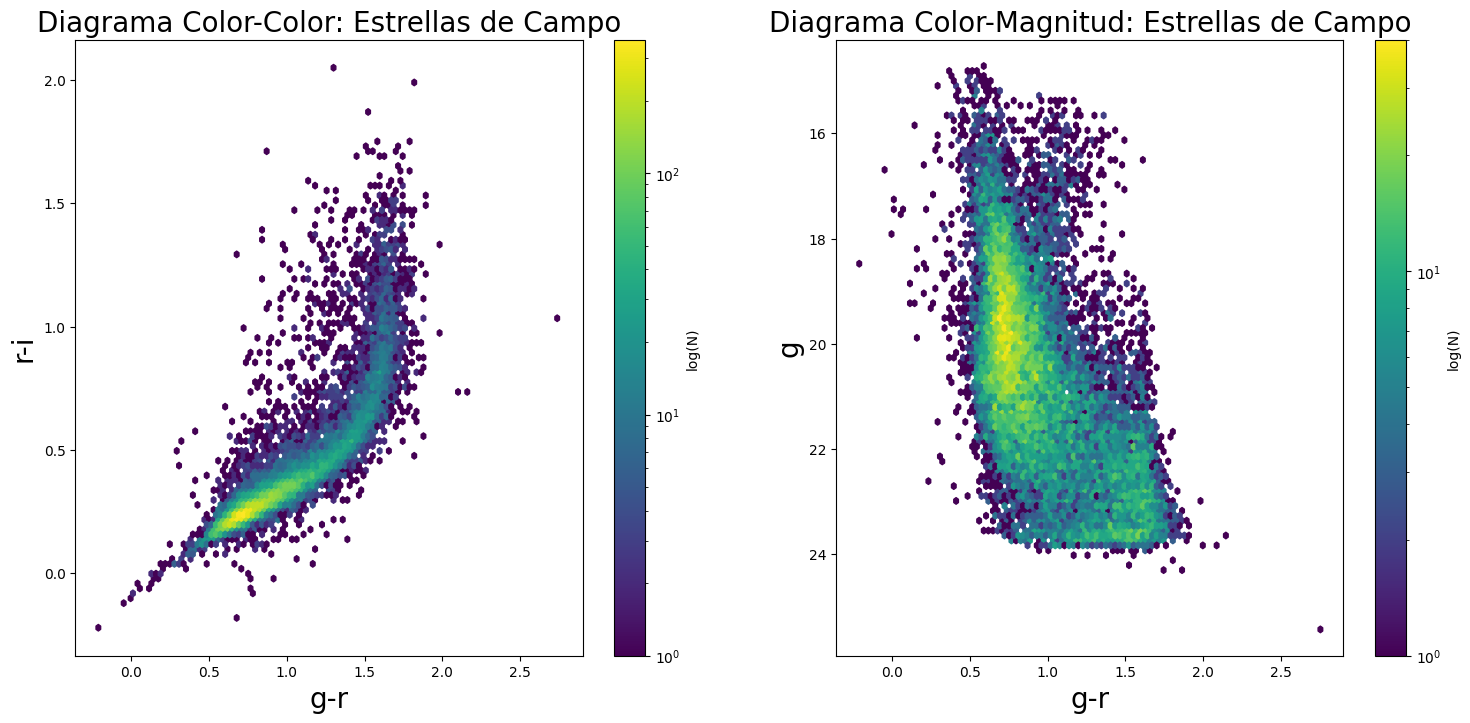

In [8]:
# Graficar diagrama color-color y diagrama color-magnitud

def plot_results(x1, y1, title1, x1_label, y1_label, x2, y2, title2, x2_label, y2_label):
    # Definir figura y subplots
    fig = plt.figure(figsize=(18, 8))
    ax1 = plt.subplot(121)
    ax2 = plt.subplot(122)
    
    # Primer subplot
    im1 = ax1.hexbin(x1, y1, bins='log', cmap=plt.cm.viridis, mincnt=1, extent=(min(x1), max(x1), min(y1), max(y1)))
    ax1.set_title(title1,fontsize=20)
    ax1.set_xlabel(x1_label,fontsize=20)
    ax1.set_ylabel(y1_label,fontsize=20)
    cb1 = plt.colorbar(im1,ax=ax1,label='log(N)')
    
    # Segundo subplot
    im2 = ax2.hexbin(x2, y2, bins='log', cmap=plt.cm.viridis, mincnt=1)
    ax2.set_title(title2,fontsize=20)
    ax2.set_xlabel(x2_label,fontsize=20)
    ax2.set_ylabel(y2_label,fontsize=20)
    ax2.set_ylim([max(y2) + 0.5, min(y2) - 0.5])
    cb2 = plt.colorbar(im2,ax=ax2,label='log(N)')

plot_results(g_r, r_i, 'Diagrama Color-Color: Estrellas de Campo', 'g-r', 'r-i', 
             g_r, g, 'Diagrama Color-Magnitud: Estrellas de Campo', 'g-r', 'g')

<a class="anchor" id="field6"></a>
## Examinar Objetos en el Visor del Cielo de Legacy Survey

Podemos seleccionar un subconjunto aún más refinado de nuestros datos para examinar objetos individuales con el Visor del Cielo (Sky Viewer) del Legacy Survey. El Sky Viewer ofrece un mapa interactivo de todo el catálogo DECaPS, así como de muchos otros conjuntos de datos. Para aislar solo unos pocos objetos de nuestros datos, definimos una función que recibe un criterio de selección particular, identifica los objetos que cumplen ese criterio y devuelve una serie de enlaces del Sky Viewer para esos objetos. 

Las entradas del usuario para esta función incluyen criterios de selección, nivel de zoom del Sky Viewer y límite de objetos a mostrar. Las salidas incluyen el enlace construido del Sky Viewer y las mediciones fotométricas asociadas para cada objeto.

In [9]:
# Definir función que proporciona enlaces al Legacy Survey Sky Viewer para una serie de objetos
def create_sky_viewer_link(selection, zoom, obj_limit):
    ra_select = ra[selection]
    dec_select = dec[selection]
    g_select = g[selection]
    g_r_select = g_r[selection]
    r_i_select = r_i[selection]
    
    if obj_limit <= len(ra_select):
        print("Objetos seleccionados ("+str(obj_limit)+" de "+str(len(ra_select))+"):")
    else:
        print("Objetos seleccionados ("+str(len(ra_select))+" de "+str(len(ra_select))+"):")
        
    for i in range(len(ra_select)):
        if i < obj_limit:
            link_string = "http://decaps.legacysurvey.org/viewer/decaps2?ra=" \
            +str(ra_select.iloc[i])+"&dec="+str(dec_select.iloc[i])+"&zoom=" \
            +str(zoom)+"&layer=decaps2"#, ":", "g_r =",g_r_select.iloc[i]
            display(HTML("<a href="+link_string+" target='_blank'>Enlace al Legacy Survey Sky Viewer: (" \
                    +str(ra_select.iloc[i])+", "+str(dec_select.iloc[i])+")</a> || g = " \
                    +str(g_select.iloc[i])+", g_r = "+str(g_r_select.iloc[i])+", r_i = " \
                    +str(r_i_select.iloc[i])))
        else:
            pass

# Ejecutar función, proporcionando criterios de selección, nivel de zoom del Sky Viewer y límite de objetos a mostrar
create_sky_viewer_link((g_r > 1.3) & (g < 16), 14, 4)

Objetos seleccionados (4 de 5):


<a class="anchor" id="dusty"></a>
# Consulta al Catálogo de Objetos de DECaPS: Región con Polvo

<a class="anchor" id="dusty1"></a>
## Visualizar Objetos a Consultar

Para nuestro segundo ejemplo, elegimos un campo insertado en el plano detrás de una importante franja de polvo. La ubicación está cerca de RA = 135, Dec = -44 (l = 265, b = 1.5), indicada por la estrella roja en la figura a continuación.

<figure>
<center>
<img src="Dusty Region.png", width=950>
<figcaption>Plano Galáctico DECaPS como se muestra en el Legacy Survey Sky Viewer. La estrella roja indica la región consultada. <a href="http://legacysurvey.org/viewer?ra=135.2032&dec=-44.338&zoom=9&layer=decaps2&ngc">Enlace a la ubicación en el Sky Viewer.</a>
</figcaption>
</center>
</figure>

<a class="anchor" id="dusty2"></a>
## Construir y Enviar una Consulta SQL

Aplicamos una búsqueda tipo caja, seleccionando los límites de AR y Dec que coinciden con la región indicada arriba.

In [10]:
## Escribir la declaración de la consulta SQL como cadena.
query2 = """
        SELECT obj_id, ra, dec, mean_mag_g_r, mean_mag_r_i,
        mean_mag_g, mean_mag_r, mean_mag_i, fracflux_avg_g, fracflux_avg_r, fracflux_avg_i
        FROM decaps_dr2.object
        WHERE (ra>134.7 AND ra<135.7 AND dec<-43.7 AND dec>-44.9
        AND NOT mean_mag_g_r='Nan' AND NOT mean_mag_g_r='Infinity' AND NOT mean_mag_g_r='-Infinity' 
        AND NOT mean_mag_r_i='Nan' AND NOT mean_mag_r_i='Infinity' AND NOT mean_mag_r_i='-Infinity')
        LIMIT 100000"""

# Enviar la consulta SQL y devolver la salida como un dataframe de Pandas.
df2 = qc.query(sql=query2, fmt='pandas')

<a class="anchor" id="dusty3"></a>
## Definir Variables con Umbral de Selección de Datos

Realizamos una selección refinada de los resultados de la consulta para evitar objetos sujetos a un hacinamiento significativo.

In [11]:
# Imprimir número de objetos en la consulta inicial.
print_initial(df2)

# Definir variables aplicando un umbral de selección de datos
ra, dec, g, g_r, r_i = variables_after_threshold(df2, 0.9)

# Imprimir número de objetos después de aplicar el umbral de calidad.
print_final(ra)

Esta consulta inicialmente contenía 10172 objetos.
Después de la selección refinada de datos, esta consulta ahora contiene 8880 objetos.


<a class="anchor" id="dusty4"></a>
## Graficar Resultados

Los diagramas color-color y color-magnitud de esta región muestran signos claros de polvo variable e irregular. En el diagrama color-color, varias estrellas se han desplazado desde el locus estelar habitual varias magnitudes a lo largo del vector de enrojecimiento, que corre diagonalmente en el diagrama. El DCM muestra estas estrellas hacia la parte roja y débil del diagrama. Observamos que la firma normalmente vertical de las estrellas de secuencia principal delgada tiene una inclinación diagonal, lo que indica que las estrellas a mayor distancia experimentan mayor atenuación por polvo. Estos diagramas podrían modelarse para recuperar la distribución tridimensional del polvo a lo largo de la línea de visión.

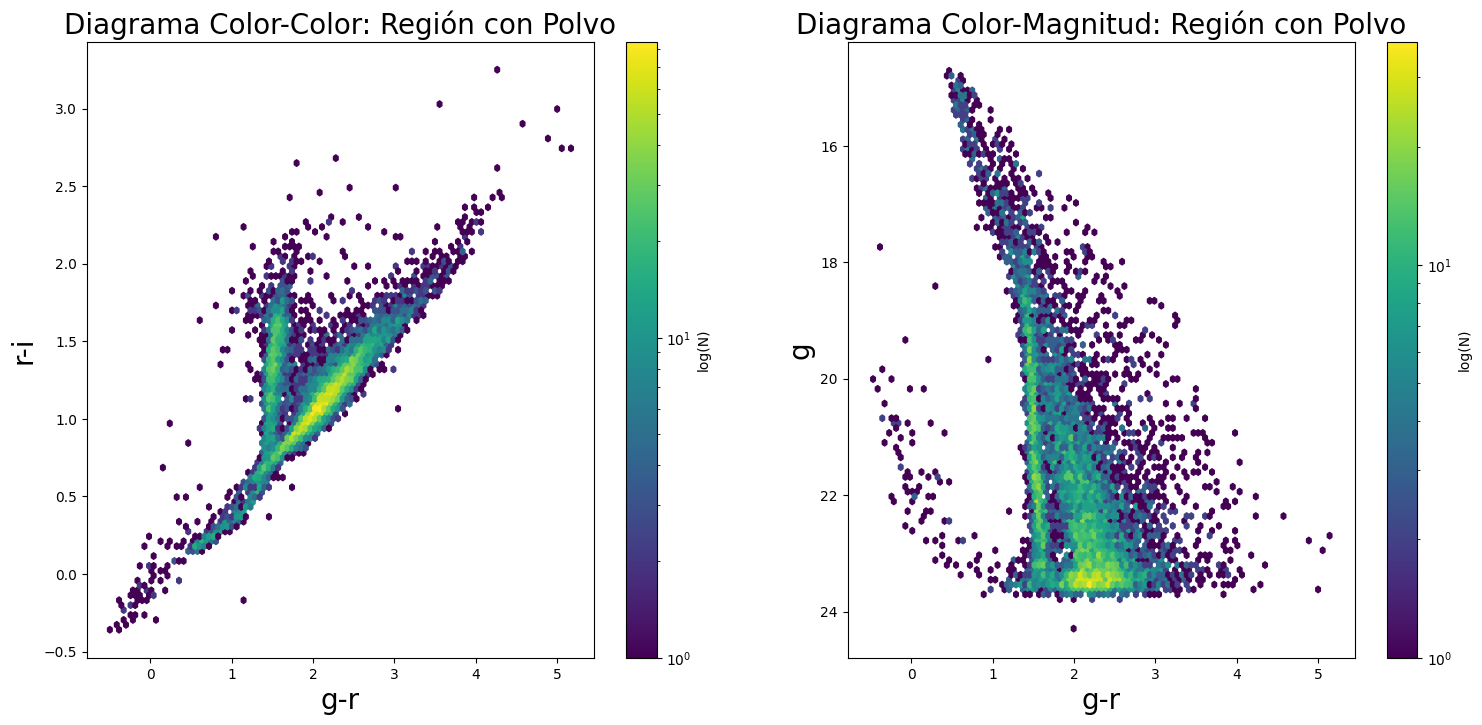

In [15]:
# Graficar diagrama color-color y diagrama color-magnitud
plot_results(g_r, r_i, 'Diagrama Color-Color: Región con Polvo', 'g-r', 'r-i', 
             g_r, g, 'Diagrama Color-Magnitud: Región con Polvo', 'g-r', 'g')

<a class="anchor" id="dusty5"></a>
## Examinar objetos en el visor del cielo de Legacy Survey

Para resaltar las dos poblaciones estelares (las que están delante y las que están detrás del polvo), seleccionamos estrellas con aproximadamente el mismo color r–i y colores g–r muy diferentes. Al examinar estos objetos en el Sky Viewer, podemos inspeccionar visualmente la presencia o ausencia de polvo en las siguientes regiones.

In [16]:
# Crear enlaces al Legacy Survey Sky Viewer para una serie de objetos

print("Estrellas más rojas donde hay polvo...")
create_sky_viewer_link((r_i < 1.61) & (r_i > 1.60) & (g_r > 1.8), 11, 2)

print("Estrellas más azules donde no hay polvo...")
create_sky_viewer_link((r_i < 1.61) & (r_i > 1.60) & (g_r < 1.8), 11, 2)
print(" ")

Estrellas más rojas donde hay polvo...
Objetos seleccionados (2 de 27):


Estrellas más azules donde no hay polvo...
Objetos seleccionados (2 de 28):


<a class="anchor" id="2447"></a>
# Consulta al Catálogo de Objetos de DECaPS: Cúmulo Abierto NGC 2447

<a class="anchor" id="24471"></a>
## Visualizar Objetos a Consultar
En nuestra última consulta, elegimos una región alrededor del cúmulo abierto NGC 2447: AR, Dec = 116.1667, -68.8823  ;  l, b = 280, -20

<figure>
<center>
<img src="Open Cluster.png", width=950>
<figcaption>Plano Galáctico DECaPS como se muestra en el Legacy Survey Sky Viewer. La estrella roja indica la región consultada. <a href="http://legacysurvey.org/viewer?ra=116.1244&dec=-23.8487&zoom=11&layer=decaps2&ngc">Enlace a la ubicación en el Sky Viewer.</a>
</figcaption>
</center>
</figure>

<a class="anchor" id="24472"></a>
## Construir y Enviar una Consulta SQL

Aplicamos una búsqueda tipo caja, seleccionando los límites de RA y Dec que coinciden con la región indicada arriba.

In [17]:
## Escribir la declaración de la consulta SQL como cadena.
query3 = """
        SELECT obj_id, ra, dec, 
        mean_mag_g_r, mean_mag_r_i,
        mean_mag_g, mean_mag_r, mean_mag_i,
        fracflux_avg_g, fracflux_avg_r, fracflux_avg_i
        FROM decaps_dr2.object
        WHERE (ra > 115.8 AND ra < 116.5 AND dec < -23.4 AND dec > -24.1 AND mean_mag_g_r > -1
        AND NOT mean_mag_g_r='Nan' AND NOT mean_mag_g_r='Infinity' AND NOT mean_mag_g_r='-Infinity' 
        AND NOT mean_mag_r_i='Nan' AND NOT mean_mag_r_i='Infinity' AND NOT mean_mag_r_i='-Infinity')
        LIMIT 100000"""

# Enviar la consulta SQL y devolver la salida como un dataframe de Pandas.
df3 = qc.query(sql=query3, fmt='pandas')

<a class="anchor" id="24473"></a>
## Definir Variables con Umbral de Selección de Datos

Realizamos una selección refinada de los resultados de la consulta para evitar objetos sujetos a un hacinamiento significativo.

In [18]:
# Imprimir número de objetos en la consulta inicial.
print_initial(df3)

# Definir variables aplicando un umbral de selección de datos
ra, dec, g, g_r, r_i = variables_after_threshold(df3, 0.9)

# Imprimir número de objetos después de aplicar el umbral de calidad.
print_final(ra)

Esta consulta inicialmente contenía 60618 objetos.
Después de la selección refinada de datos, esta consulta ahora contiene 44394 objetos.


<a class="anchor" id="24474"></a>
## Graficar Resultados

En el CMD resultante, se observa la secuencia del cúmulo para NGC 2447.

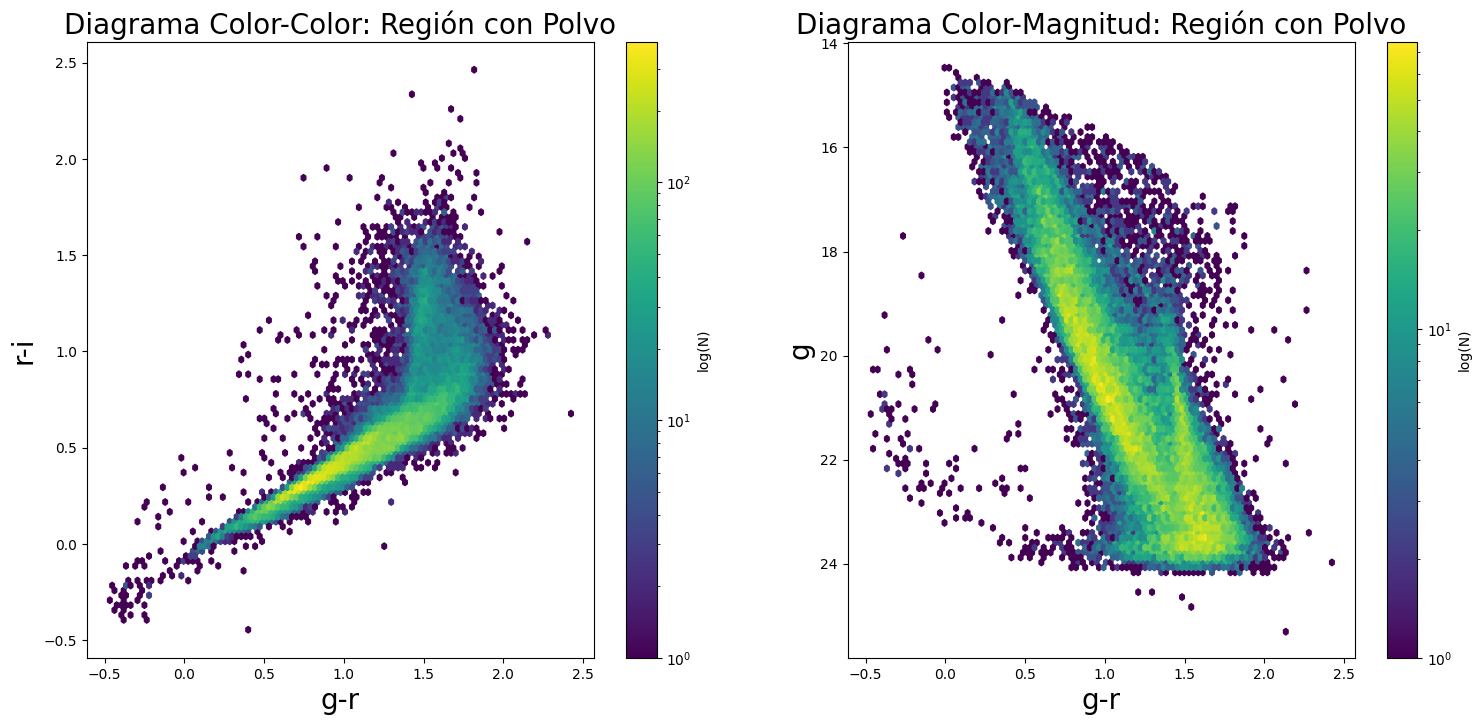

In [19]:
# Graficar diagrama color-color y diagrama color-magnitud
plot_results(g_r, r_i, 'Diagrama Color-Color: Región con Polvo', 'g-r', 'r-i', 
             g_r, g, 'Diagrama Color-Magnitud: Región con Polvo', 'g-r', 'g')

<a class="anchor" id="24475"></a>
## Examinar Objetos en el Legacy Survey Sky Viewer

A continuación examinamos objetos dentro de la secuencia de enanas blancas, con selecciones de color y magnitud basadas en el CMD anterior.

In [20]:
# Crear enlaces al Legacy Survey Sky Viewer para una serie de objetos
create_sky_viewer_link((g_r < 0) & (g > 20) & (g < 20.5), 15, 2)

Objetos seleccionados (2 de 5):


<a class="anchor" id="resources"></a>
## Recursos y Referencias

* [DECaPS ADS Link (Saydjari+)](https://ui.adsabs.harvard.edu/abs/2022arXiv220611909S/abstract)  
* [DECaPS Team Website](http://decaps.skymaps.info)  
* [Data Lab DECaPS Page](https://datalab.noirlab.edu/decaps/index.php)  
* [Legacy Survey Interactive Viewer](http://legacysurvey.org/viewer)